<a href="https://colab.research.google.com/github/kaif22mohammed/Data-science-learning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#get an insight from who survived like what age category,gender etc
#1 most of the passengers that survived are female
#2 most of the passengers who survived aged between 20-30 and kids who are younger than 20 also survived 
#find what seating passengers survived the most 
#1 passengers who embarked in 's' survived a lot
#2 we cant say which cabin passengers survived alot because there are many Nan rows are there
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
titanic = pd.read_csv(r'https://raw.githubusercontent.com/kaif22mohammed/practice/main/tested.csv?token=GHSAT0AAAAAABY4CFKVTCBEMOGD2EUCKZ6UYZP7BIQ')

In [52]:
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.108615,-0.000013,0.191514
Pclass,-0.108615,1.000000,-0.492143,-0.577147
Age,-0.000013,-0.492143,1.000000,0.337932
Fare,0.191514,-0.577147,0.337932,1.000000


In [8]:
titanic.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
titanic.drop(['PassengerId',],axis = 1,inplace = True)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
titanic.nunique()

Survived      2
Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

In [13]:
titanic['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [14]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [15]:
#i already removed Cabin and Age 
titanic.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [16]:
titanic

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN,S


In [17]:
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.108615,-0.000013,0.191514
Pclass,-0.108615,1.000000,-0.492143,-0.577147
Age,-0.000013,-0.492143,1.000000,0.337932
Fare,0.191514,-0.577147,0.337932,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


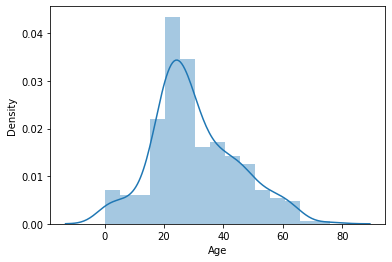

In [18]:
sns.distplot(titanic['Age'])

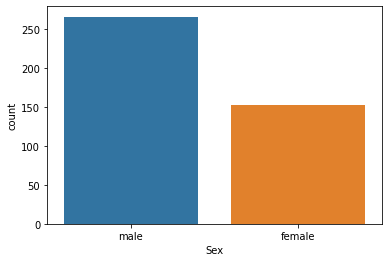

In [19]:
sns.countplot(x="Sex",data = titanic)

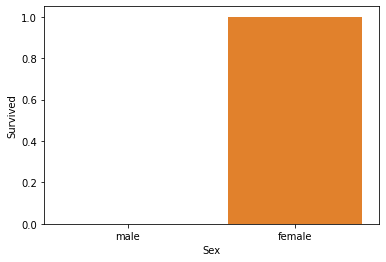

In [20]:
sns.barplot(x="Sex", y = "Survived", data = titanic)

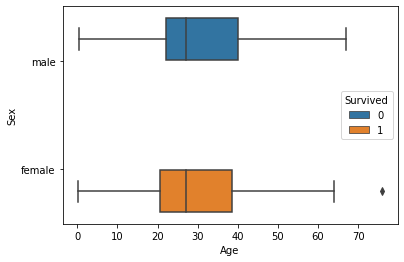

In [21]:
sns.boxplot(x="Age", y="Sex",data = titanic, hue="Survived")

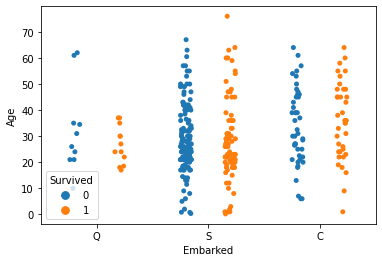

In [32]:
sns.stripplot(x="Embarked", y="Age", data= titanic,jitter=True ,hue="Survived", dodge=True)

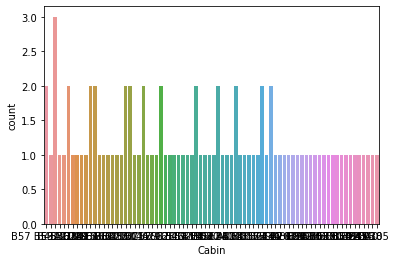

In [42]:
sns.countplot(x="Cabin",data = titanic)

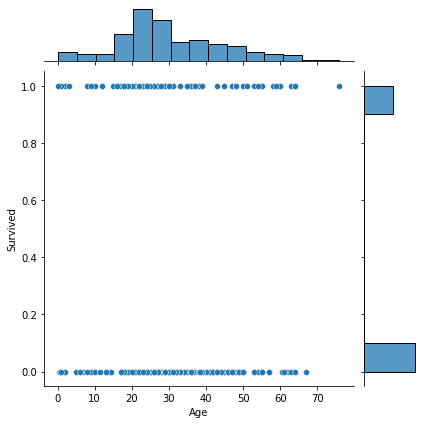

In [67]:
sns.jointplot(data=titanic, x="Age", y="Survived")

In [65]:
titanic['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [68]:
titanic['Age'].min()

0.17